In [117]:
import matplotlib.pyplot as plt
import numpy as np
from urllib import urlopen
import os
from IPython import get_ipython


%matplotlib inline

#baseURL = "http://golem.fjfi.cvut.cz/utils/data/" #global
baseURL = "/golem/database/operation/shots/" #local

execfile ('/GW/SW/VoSvGolem/commons.py') # Basic libraries HokusPokus mirime k pygolem


mkdir('raws'); mkdir('avmean'); mkdir('rezy');mkdir('rezy.jpg');mkdir('ReferenceShot');mkdir('graphs')


KlouzavyPrumer=500
time=[5000,24000,KlouzavyPrumer];  # [start,end,step] [us]
ReferenceShot=23000

# Který shot patří ke kterému parametru:
#setup=[[75,2992],[75,2993],[95,2994],[90,2995],[85,2996],[80,2997],[75,2998],[70,2999],[65,3000],[95,3004]]
setup=[[95,2994],[90,2995],[85,2996],[80,2997],[75,2998],[70,2999],[65,3000],[95,3004]]
startindex=setup[0][1]





8

In [2]:
def StazeniDat(diagnSPEC, alias):
    print 'Stazeni raw dat:'+ diagnSPEC+' to '+alias
    for i in setup:
        if  not os.path.isfile('raws/2'+str(i[1])+alias):
            np.savetxt('raws/2'+str(i[1])+alias,open_data('2'+str(i[1]),diagnSPEC)['data']*1)
    

StazeniDat('DAS/1011Papouch_St.ON/Papouch_St_09','LP_rp1')    
StazeniDat('DAS/1011Papouch_St.ON/Papouch_St_08','LP_rp5')    
StazeniDat('DAS/1011Papouch_St.ON/Papouch_St_11','LP_bpp')    
StazeniDat('DAS/1011Papouch_St.ON/Papouch_St_12','BPP')    

Stazeni raw dat:DAS/1011Papouch_St.ON/Papouch_St_09 to LP_rp1
Stazeni raw dat:DAS/1011Papouch_St.ON/Papouch_St_08 to LP_rp5
Stazeni raw dat:DAS/1011Papouch_St.ON/Papouch_St_11 to LP_bpp
Stazeni raw dat:DAS/1011Papouch_St.ON/Papouch_St_12 to BPP


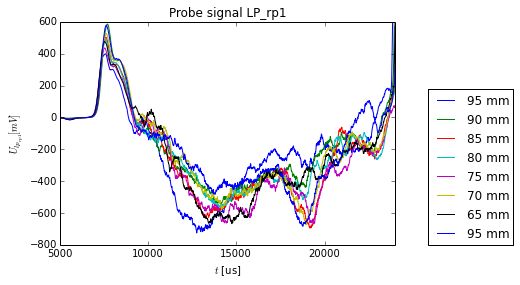

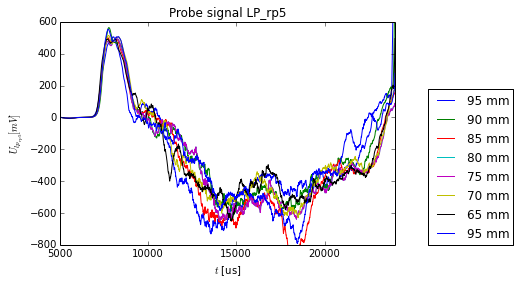

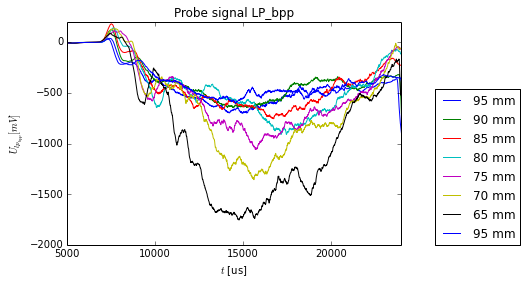

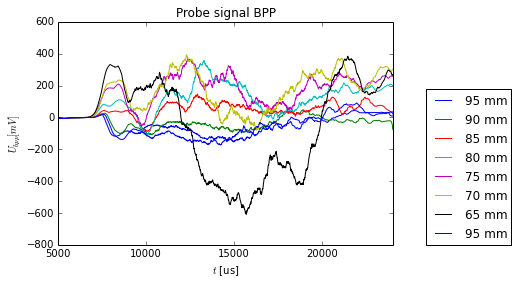

In [3]:
def VyklouzaniVykresleni(alias,ylim1,ylim2,skluz,ylabel):

    #print "Vyklouzani dat ..."+alias
    plt.ylim(ylim1,ylim2);plt.xlim(time[0],time[1]);

    for i in setup:    
        np.savetxt('avmean/2'+str(i[1])+alias,running_mean(np.loadtxt('raws/2'+str(i[1])+alias),KlouzavyPrumer));    

    # Vykresleni
    for i in setup:    
        plt.plot(np.loadtxt('avmean/2'+str(i[1])+alias),label=str(i[0])+' mm'); 
    
    plt.legend(loc=(1.1, 0));
    plt.ylabel(ylabel)
    plt.title('Probe signal '+alias)
    plt.xlabel('$t$ [us]')
    plt.savefig('graphs/vyklouzani'+alias+'.jpg', bbox_inches='tight')
    plt.show();
    plt.close();
    

VyklouzaniVykresleni('LP_rp1',-800,600,KlouzavyPrumer,'$U_{lp_{rp1}} [mV]$')
VyklouzaniVykresleni('LP_rp5',-800,600,KlouzavyPrumer,'$U_{lp_{rp5}} [mV]$')
VyklouzaniVykresleni('LP_bpp',-2000,200,KlouzavyPrumer,'$U_{lp_{bpp}} [mV]$')
VyklouzaniVykresleni('BPP',-800,600,KlouzavyPrumer,'$U_{bpp} [mV]$')


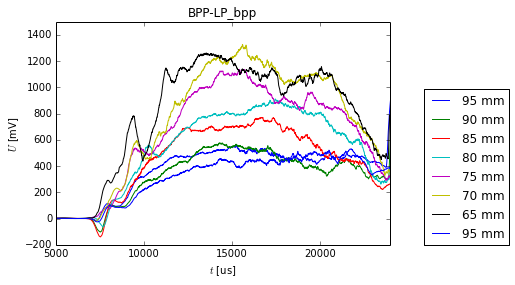

In [6]:
#print "Rozdil bpp-lp_bpp"
#plt.ylim(ylim1,ylim2);
plt.xlim(time[0],time[1]);
plt.ylim(-200,1500);

for i in setup:    
    np.savetxt('avmean/2'+str(i[1])+'BPP-LP_bpp',\
    np.loadtxt('avmean/2'+str(i[1])+'BPP')-np.loadtxt('avmean/2'+str(i[1])+'LP_bpp'));    


# Vykresleni
for i in setup:    
    plt.plot(np.loadtxt('avmean/2'+str(i[1])+'BPP-LP_bpp'),label=str(i[0])+' mm'); 
    
plt.legend(loc=(1.1, 0));
plt.title('BPP-LP_bpp')
plt.ylabel('$U$ [mV]')
plt.xlabel('$t$ [us]')
plt.savefig('graphs/bpp_minus_lpbpp.jpg', bbox_inches='tight')
plt.show();
plt.close();    

Referencni vyboj ...


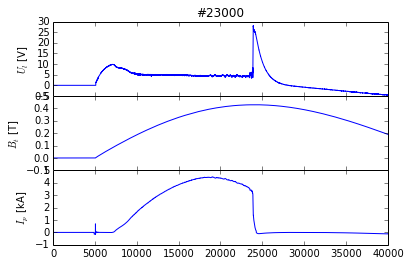

In [88]:
print "Referencni vyboj ..."
os.system('scp '+baseURL + str(ReferenceShot) + '/basicdiagn/Btoroidal.npz ReferenceShot/Btoroidal.npz');
os.system('scp '+baseURL + str(ReferenceShot) + '/basicdiagn/Iplasma.npz ReferenceShot/Iplasma.npz');
os.system('scp '+baseURL + str(ReferenceShot) + '/basicdiagn/Uloop.npz ReferenceShot/Uloop.npz');
os.system('scp '+baseURL + str(ReferenceShot) + '/basicdiagn/graphpres.png ReferenceShot/');
Btoroidal=np.load('ReferenceShot/Btoroidal.npz');
Iplasma=np.load('ReferenceShot/Iplasma.npz');
Uloop=np.load('ReferenceShot/Uloop.npz');

f,ax = plt.subplots(3,sharex=True);subplots_adjust(hspace=0.001)
ax[0].set_title('#' + str(ReferenceShot))
ax[0].plot(Uloop['data']);ax[0].set_ylabel('$U_l$ [V]')
ax[1].plot(Btoroidal['data']);ax[1].set_ylabel('$B_t$ [T]')
ax[2].plot(Iplasma['data']/1000);ax[2].set_ylabel('$I_p$ [kA]')
plt.savefig('ReferenceShot/ReferenceShot.jpg', bbox_inches='tight')
plt.show();
plt.close();

In [121]:
def partfig(data,timemark):
    fig, ax1 = plt.subplots();
    ax1.set_ylim(-200,1400);
    ax1.plot(data, 'ro');
    ax1.set_ylabel('$r_BPP$ [mm]')
    ax1.set_xlabel('$U_{BPP}-U_{LP_bpp}$ [V] (#2+ShotNo)')
    ax1.axhline(0);
    ax1.set_title('t='+str(timemark*1.0/1000)+' ms')
    ax1.set_xticks([i for i in xrange(0,len(setup),1)])
    ax1.set_xticklabels([str(setup[i][0])+' mm \n (#'+str(setup[i][1])+')' for i in xrange(0,len(setup),1)], rotation=90)
    #ax2 = fig.add_axes([0.25, 0.25, 0.3, 0.18]);
    #ax2.set_xlim(time[0],time[1]);
    #ax2.set_yticks([i for i in xrange(0,4000,1000)])
    #ax2.set_yticklabels([i for i in xrange(0,4,1)])
    #ax2.set_xticks([i for i in xrange(time[0],time[1],2000)])
    #ax2.set_xticklabels([i for i in xrange(time[0]/1000,time[1]/1000,2)])
    #ax2.plot(Btoroidal['data']);
    #ax2.axvline(timemark);
    #ax2.set_ylabel('$I_p$ [kA]')
    #ax3 = fig.add_axes([0.25, 0.43, 0.3, 0.18]);
    #ax3.set_yticks([0,0.1,0.2,0.3,0.4])
    #ax3.set_xticklabels([]);
    #ax3.set_xlim(time[0],time[1]);
    #ax3.plot(Iplasma['data']);
    #ax3.axvline(timemark);
    #ax3.set_ylabel('$B_t$ [T]')
    #ax2.set_xlabel('$t$ [ms]')
    #plt.show(); #just for tuning
    plt.savefig('rezy.jpg/'+str(timemark)+'.jpg', bbox_inches='tight');
    plt.close();



In [122]:
print "Rezani .."
#Prvni nacteme data do velke matice
data=[];
for i in setup:data.append(np.loadtxt('avmean/2'+str(i[1])+'BPP-LP_bpp'));

Rezani ..


In [124]:
# A tady to narezeme a vygenerujeme obrazky
for j in xrange(time[0],time[1],time[2]): 
    #print "Rez .."+str(j)+"/"+str(time[1])+"\n"
    timeslot=[]
    k=0;
    for i in setup: 
        timeslot.append(data[k][j]);
        k=k+1;
    np.savetxt('rezy/'+str(j),timeslot);
    partfig(timeslot,j)

In [105]:
os.system('rm index.page');
fileid = open('index.page','a+')
fileid.write('---\nformat:markdown\n...\n')
fileid.write('# Experimental setup\n\n')
fileid.write('# Ball pen probe @ North-East port \n\n')
fileid.write('<center><a href="setup/ExpSetup-BPP.png"><img src="setup/ExpSetup-BPP.png" width="50%"></a>\n\n[setup](setup/)\n</center>\n')
fileid.write('# Double Rake probe @ South-East port \n\n')
fileid.write('<center><a href="setup/ExpSetup-RP.png"><img src="setup/ExpSetup-RP.png" width="50%"></a>\n\n[setup](setup/)\n</center>\n')
fileid.write('# Reference shot #'+str(ReferenceShot)+'\n')
fileid.write('<center><a href="http://golem.fjfi.cvut.cz/shots/'+str(ReferenceShot)+'/"><img src="ReferenceShot/graphpres.png" width="50%"></a>\n\n[Reference shot data](ReferenceShot/)\n</center>\n')
fileid.write('# Discharges\n<ul>\n');
fileid.write('Parameter: r<sub>bpp</sub> is a Ball pen probe position with respect to the plasma centre\n\n');
for i in setup:fileid.write('<li><a href="http://golem.fjfi.cvut.cz/shots/2'+str(i[1])+'">r<sub>bpp</sub> = '+str(i[0])+' mm @ #2'+str(i[1])+'</a></li>\n');
fileid.write('</ul>\n');
fileid.write('# Data manipulation\n');
fileid.write('## Raw data\n')
fileid.write('\n\n<center>[raw data ->](raws/)\n</center>\n')
fileid.write('## mean average (over '+str(KlouzavyPrumer)+' data)\n')
fileid.write('<center>\
<img src="graphs/vyklouzaniBPP.jpg" width="50%">\
<img src="graphs/vyklouzaniLP_bpp.jpg" width="50%"></br>\
<img src="graphs/vyklouzaniLP_rp1.jpg" width="50%">\
<img src="graphs/vyklouzaniLP_rp5.jpg" width="50%">\
\n\n[mean average data ->](avmean/)\n</center>\n')
fileid.write('## BPP - LP_bpp \n')
fileid.write('<center><img src="graphs/bpp_minus_lpbpp.jpg" width="50%">\n\n[data](avmean/)\n</center>\n')
fileid.write('# Final movie\n')
fileid.write('<center><img src="finalmovie.gif">\n\n[time cuts - figures](rezy.jpg/)\n</center>\n')
fileid.write('# Experimental Photo\n') 
fileid.write('<center><img src="setup/ExpSetupPhoto_w.jpg"></center>\n\n')
fileid.write('# Resources\n')
fileid.write('\n* [python Source code](Analysis.html)\n* [Jupyter notebook](Analysis.ipynb)\n* [Python export](Analysis.py)\n')             
fileid.close()